In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\Cars (1).csv")
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [3]:
df.shape

(81, 5)

In [4]:
df.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [5]:
df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


array([[<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>]], dtype=object)

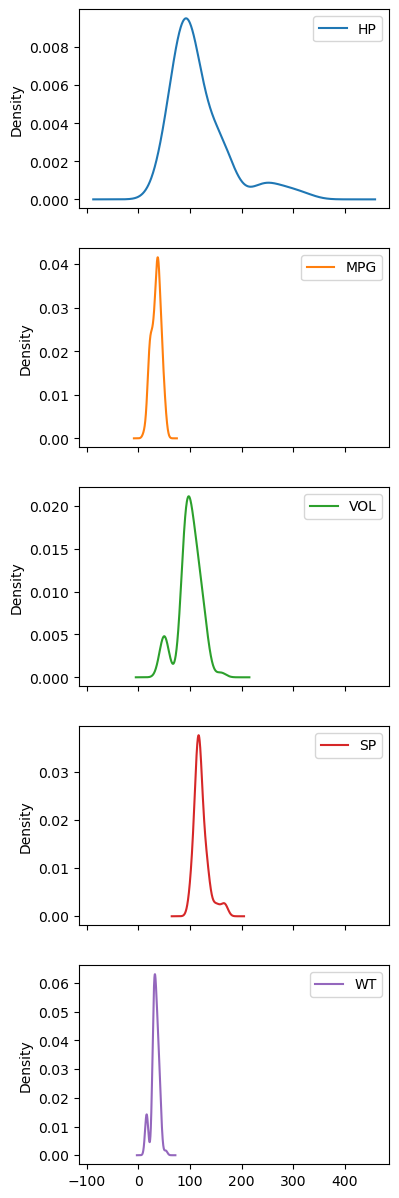

In [19]:
df.plot(kind = 'kde' , subplots = True , layout = (5,1) , figsize=(4,15))

In [16]:
import statsmodels.api as sm

In [17]:
X = df.drop('MPG' , axis=1)
y = df['MPG']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=23)
print(X_train.shape)
print(X_test.shape)

(64, 4)
(17, 4)


In [20]:
X_train = sm.add_constant(X_train)
X_train
#FIlling constant becz OLS doesnt provide constant value

,const,HP,VOL,SP,WT
7,1.0,62,50,102.598513,15.847758
44,1.0,93,102,114.380966,33.078632
11,1.0,92,50,117.598513,15.753535
20,1.0,92,99,119.105055,32.324650
34,1.0,81,101,111.288996,32.701644
...,...,...,...,...,...
76,1.0,322,50,169.598513,16.132947
31,1.0,84,101,112.288996,33.234361
54,1.0,160,113,135.392639,37.254392
73,1.0,140,160,124.715241,52.997752


In [23]:
model = sm.OLS(y_train , X_train).fit()

In [27]:
model.

<bound method RegressionResults.info_criteria of <statsmodels.regression.linear_model.OLSResults object at 0x0000017FB233D550>>

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     41.37
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.73e-16
Time:                        12:26:27   Log-Likelihood:                -186.79
No. Observations:                  64   AIC:                             383.6
Df Residuals:                      59   BIC:                             394.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4355     18.789      2.046      0.045       0.839      76.032
HP            -0.1788      0.052     -3.459      0.001      -0.282      -0.075
VOL           -0.3585      0.669     -0.536      0.594      -1.697       0.980
SP             0.3103      0.205      1.513      0.136      -0.100       0.721
WT             0.4593      1.987      0.231      0.818      -3.516       4.434
==============================================================================
Omnibus:                        4.379   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                3.441
Skew:                           0.506   Prob(JB):                        0.179
Kurtosis:                       3.515   Cond. No.                     6.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Explaination of above**
* **Dependent Variable:** This section usually lists the dependent variable (the variable being predicted) in the regression model.

* **Model:** It describes the model specifications, including the formula used for the regression, the number of observations, and the names of the variables used in the model.

* **Method:** This section describes the estimation method used, which in this case is Ordinary Least Squares (OLS).

* **Date:** The date and time when the regression was performed.

* **Time:** The time taken to fit the regression model.

* **Number of Observations:** This is the number of data points used in the regression analysis.

* **Degrees of Freedom:** This typically refers to the degrees of freedom associated with the model, residuals, and parameters.

* **Residuals:** This section provides statistics related to the residuals (the differences between observed and predicted values) of the regression model. It may include measures such as mean, median, minimum, maximum, and standard deviation of residuals.

* **R-squared:** This is a measure of how well the independent variables explain the variation in the dependent variable. It ranges from 0 to 1, with higher values indicating a better fit.

* **Adj. R-squared:** This is a modified version of the R-squared statistic that adjusts for the number of predictors in the model. It penalizes the addition of unnecessary predictors.

* **F-statistic and p-value:** The F-statistic is a measure of overall significance of the model. The associated p-value indicates the probability of observing the F-statistic by chance if the null hypothesis (that all coefficients are zero) is true.

* **Coefficients:** This section provides the estimated coefficients for each independent variable in the model, along with their standard errors, t-statistics, and p-values. These coefficients represent the estimated effect of each independent variable on the dependent variable, holding all other variables constant.

* **Omnibus, Prob(Omnibus):** These are measures of the normality of the residuals. The Omnibus test provides a single statistic to test the null hypothesis that the residuals are normally distributed. The associated p-value indicates the probability of observing the Omnibus statistic by chance if the residuals were normally distributed.

* **Durbin-Watson:** This is a test for autocorrelation in the residuals. It ranges from 0 to 4, with values around 2 indicating no autocorrelation.

* **Jarque-Bera (JB) and Prob(JB):** These are additional tests for normality of the residuals. JB is a measure of skewness and kurtosis of the residuals, and Prob(JB) is the associated p-value.

* **Cond. No.:** This is a measure of multicollinearity among the independent variables. Values above 30 may indicate multicollinearity issues.

In [29]:
#Resisuals
model.resid

7     -1.823666
44    -0.284810
11    -8.433384
20     0.109070
34     2.231915
        ...    
76    13.924278
31     2.112907
54    -1.591887
73    -0.004361
40     0.919341
Length: 64, dtype: float64

**Assumption of Linear Regresssion**
* **1. Linear Relationship between input and output**

In [ ]:
#Relationship Identification

In [30]:
X_train.columns

Index(['const', 'HP', 'VOL', 'SP', 'WT'], dtype='object')

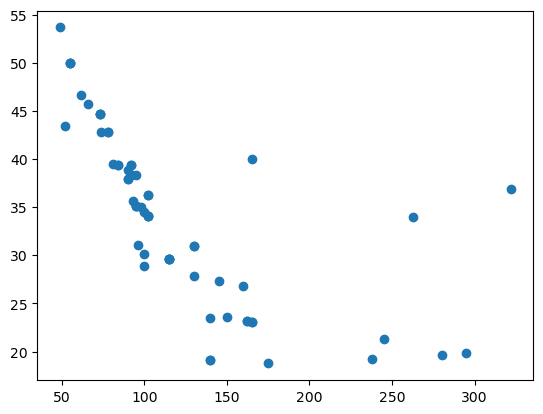

In [31]:
plt.scatter(X_train['HP'] , y_train)

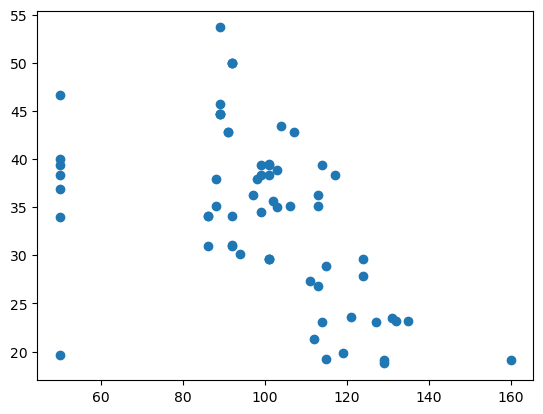

In [32]:
plt.scatter(X_train['VOL'] , y_train)

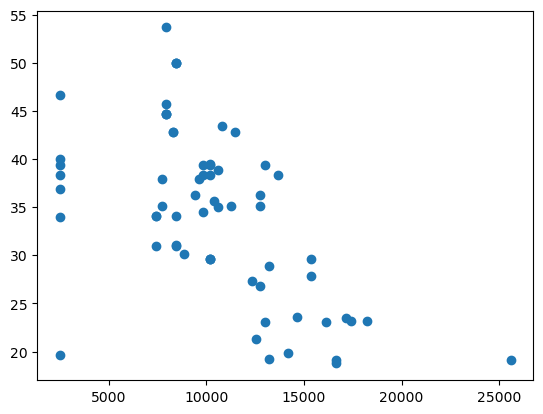

In [34]:
plt.scatter(np.square(X_train['VOL']) , y_train) #TO get exact relationship perform transformation technique

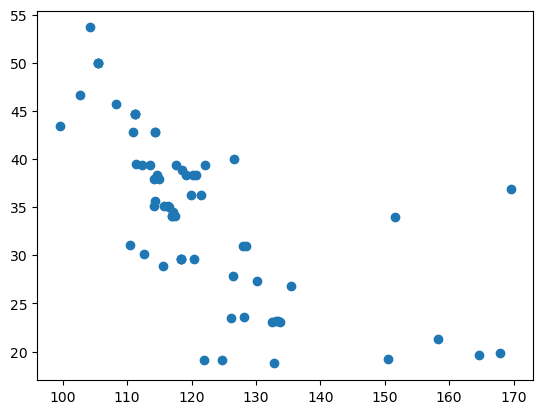

In [35]:
plt.scatter(X_train['SP'] , y_train)

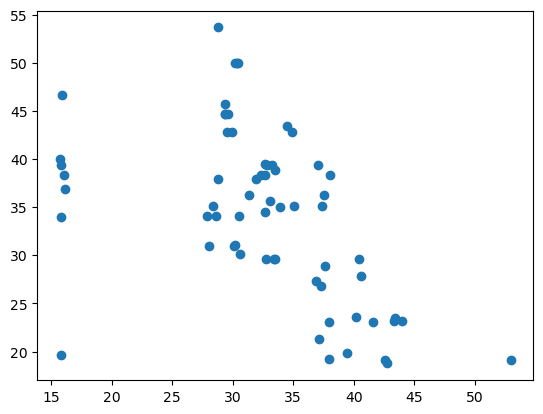

In [36]:
plt.scatter(X_train['WT'] , y_train)

* **2. Independant :- Low/Zero Variance , Independancy of input features.**

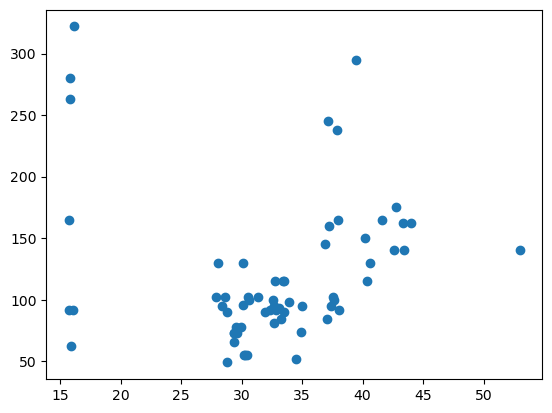

In [37]:
plt.scatter(X_train['WT'] , X_train['HP'])

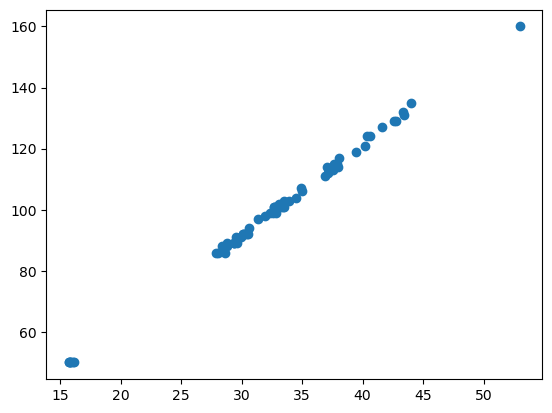

In [38]:
plt.scatter(X_train['WT'] , X_train['VOL'])
#Multi colinear, among these select one feature, based on relationship with target, which is giving more select that

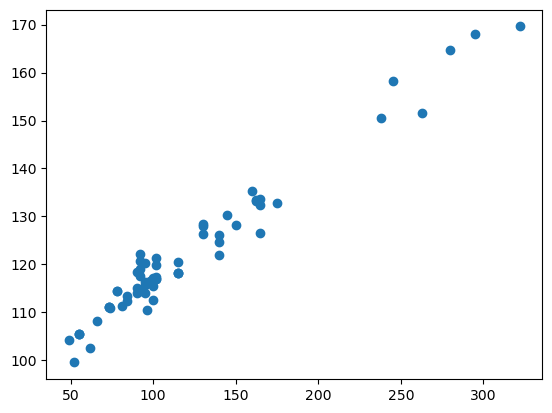

In [40]:
plt.scatter(X_train['HP'] , X_train['SP'])
#Multi colinear, among these select one feature, based on relationship with target, which is giving more select that

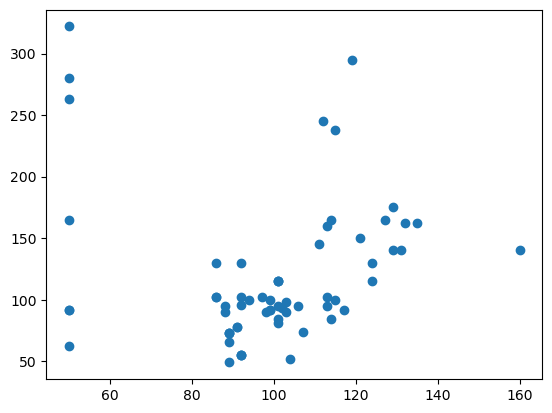

In [41]:
plt.scatter(X_train['VOL'] , X_train['HP'])

In [ ]:
#Variance

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
for i in range(X_train.shape[1]):
    print(f'{df.columns[i]}  :' , variance_inflation_factor(X_train.values , i))

HP  : 1037.7576181484474
MPG  : 27.374931332449133
VOL  : 673.0997664815256
SP  : 27.3676683808407
WT  : 672.8343346323046


* **3. Normal distributionn of residuals with zero mean**

<Axes: ylabel='Density'>

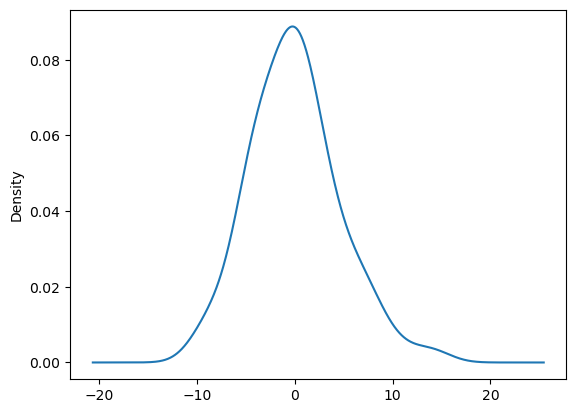

In [51]:
model.resid.plot(kind='kde')

* **4. Equal Variance**

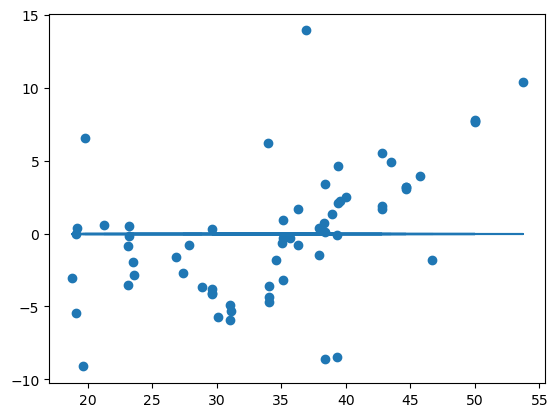

In [56]:
residual = model.resid
plt.scatter(y_train, residual)
plt.plot(y_train,[0] * len(y_train))

* Points are equal to both side

* **5. No Auto correlation between inputs and errors**

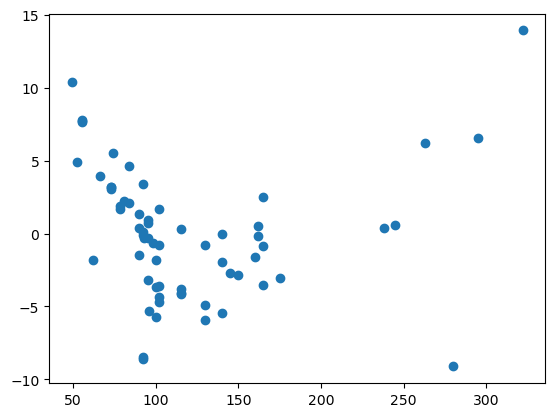

In [52]:
plt.scatter(X_train['HP'] , model.resid)

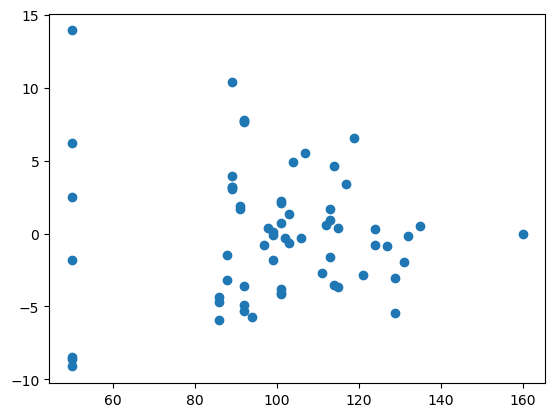

In [54]:
plt.scatter(X_train['VOL'] , model.resid)

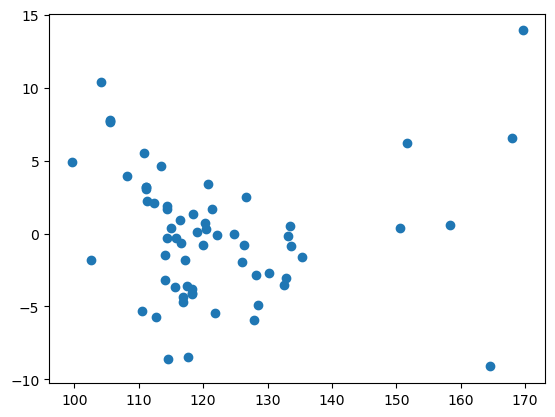

In [55]:
plt.scatter(X_train['SP'] , model.resid)